In [1]:
# set up some colors and text attributes to markdown
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
        - The actual delivery time duration (days) is taken as the period between order approved and when order was delivered to the customer. It is the timedelta difference between order_approved_at and order_received_customer date attributes.
        - A major practical success factor, with respect to the business, is to use relevant attributes recorded by the order transactions to predict this delivery duration within an error margin (i.e. Root Mean Squared Error) of 3 days.
        
    - **Task 2: Classification** Classify for review score
        - To predict review score using relevant attributes that are associated with the review score.
        - A key business purpose of this task is to determine the features have the most influence on the review score.
            - This will inform improvement to factors that result in negative review score and maintain those that result in positive review score 
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


In [2]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation (15 points total)
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
*[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

## <span style='color:blue'><u> Data Preparation and pre-processing </u></span>
* This exercise seeks to fit:
    - **Data Preparation** 'Olist_lab1_data.csv' (114067 instances and 47 attributes) will be prepared for the model.  
        - This dataset is the resulted from robust data preparation steps applied to the original raw dataset.
        - This was submitted at the deliverable for Lab 1.
        - As reminder, the original raw dataset was received in multiple files (10 files).
        - This files were merged using the attribute's unique key contraints as the case may be.  
        - In the current version of the dataset we will take care of the following:
            - re-label categorical levels with less than 500 observations as 'others'.
            - Beneficially, this will imply that the new columns generated by one hot encoding are actual contributing useful variance to the dataset.
            - It will all improve class imbalance with respect to the affected attributes.
            - Suspect categorical attributes are Product categories and Customer city;
            - The resulting one-to-many effect of the join operation used to merge the dataset may have caused some instances to be duplicated when certain unique id attributes are dropped from the eventual dataset.
            - The duplicates in the final version of the dataset will be removed, chiefly because:
                - According to Schafer (2013, pp. 91), independence of observations is a key assumption that should be met before applying linear models to a dataset. Occurence of duplicates in our dataset can cause cluster effect which directly implies a lack of independence (e.g. Schafer 2013, pp. 91). 
               **Reference**: Ramsey Schafer, 2013: The Statistical Sleuth. 3rd Edition.       
    

In [3]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Lab 2_Classification")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Machine Learning 1\\Lab 2_Classification'

In [4]:
olist = pd.read_csv('olist_lab1_data.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [5]:
olist.customer_city.value_counts()

sao paulo         18001
rio de janeiro     7872
belo horizonte     3159
brasilia           2400
curitiba           1775
                  ...  
teixeira              1
peixe                 1
guinda                1
coimbra               1
farol                 1
Name: customer_city, Length: 4073, dtype: int64

In [6]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [7]:
import copy
olist_model = copy.deepcopy(olist)
olist_model.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [8]:
#See the distribution of observations among the categorical levels
olist_model.customer_city.value_counts()

sao paulo         18001
rio de janeiro     7872
belo horizonte     3159
brasilia           2400
curitiba           1775
                  ...  
teixeira              1
peixe                 1
guinda                1
coimbra               1
farol                 1
Name: customer_city, Length: 4073, dtype: int64

{'bodies': [<matplotlib.collections.PolyCollection at 0x19a72361ec8>],
 'cmeans': <matplotlib.collections.LineCollection at 0x19a7238f188>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x19a71fa80c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x19a75fb1588>,
 'cbars': <matplotlib.collections.LineCollection at 0x19a75fb1ac8>}

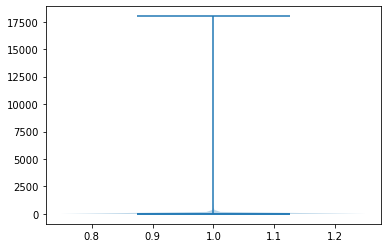

In [9]:
#I created the value counts as a dataframe so I better index/access the attributes for plots.
cu_city = olist_model.customer_city.value_counts().to_frame()
cu_city=cu_city.reset_index()
plt.violinplot(cu_city.customer_city, showmeans=True)

In [10]:
cu_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4073 non-null   object
 1   customer_city  4073 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.8+ KB


In [11]:
import matplotlib as mpl

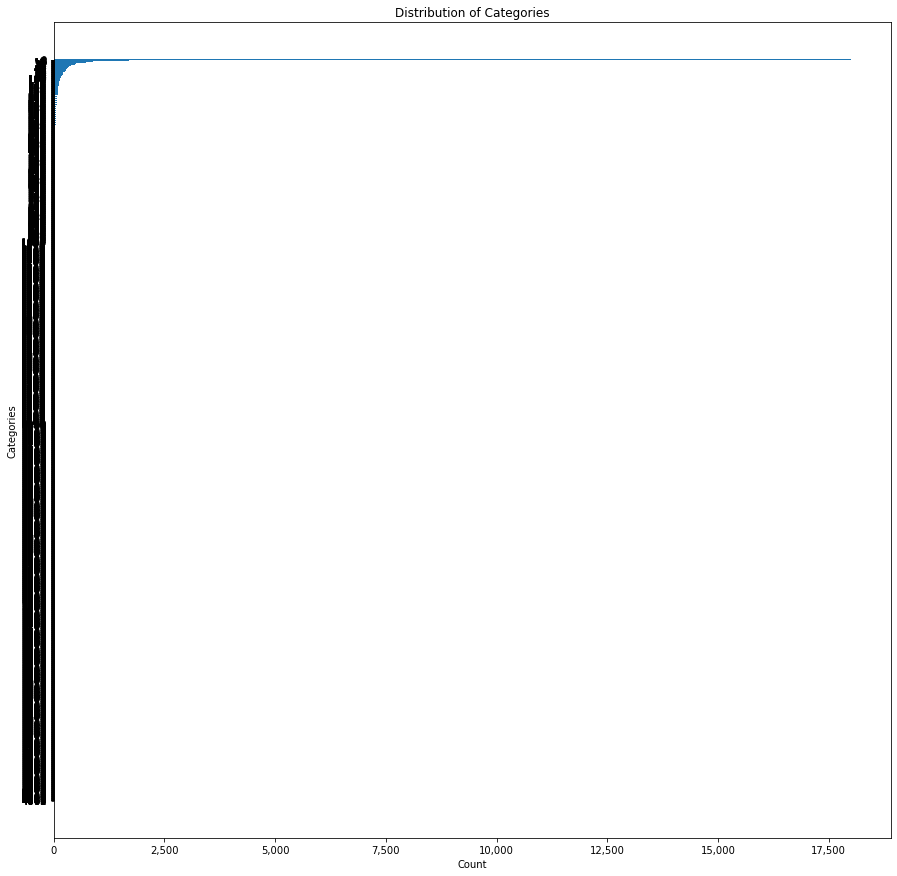

In [12]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('Categories')
plt.xlabel('Count')
plt.show()

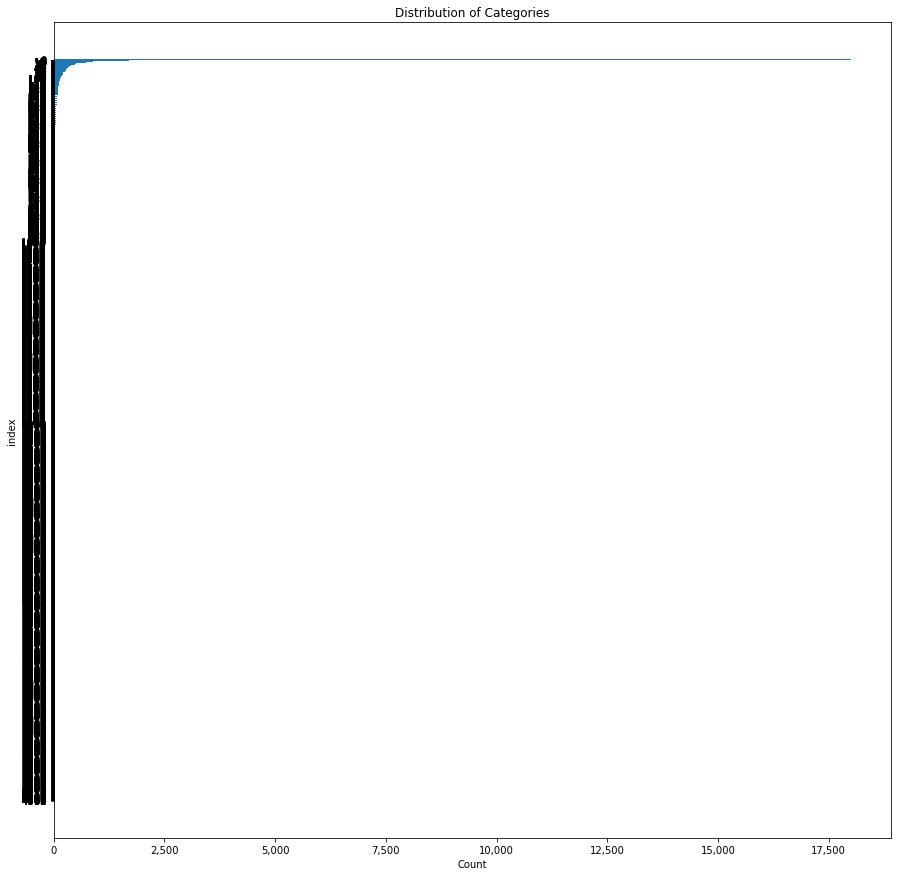

In [13]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x19a01f8dd88>],
 'cmeans': <matplotlib.collections.LineCollection at 0x19a01f8d308>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x19a01e4c108>,
 'cmins': <matplotlib.collections.LineCollection at 0x19a01f3d848>,
 'cbars': <matplotlib.collections.LineCollection at 0x19a01fc3dc8>}

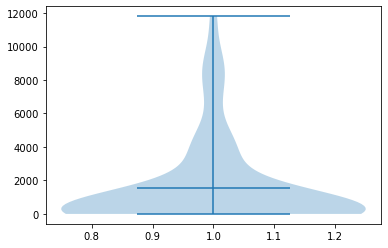

In [14]:
prod_cat = olist_model.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()
plt.violinplot(prod_cat.product_category_english, showmeans=True)

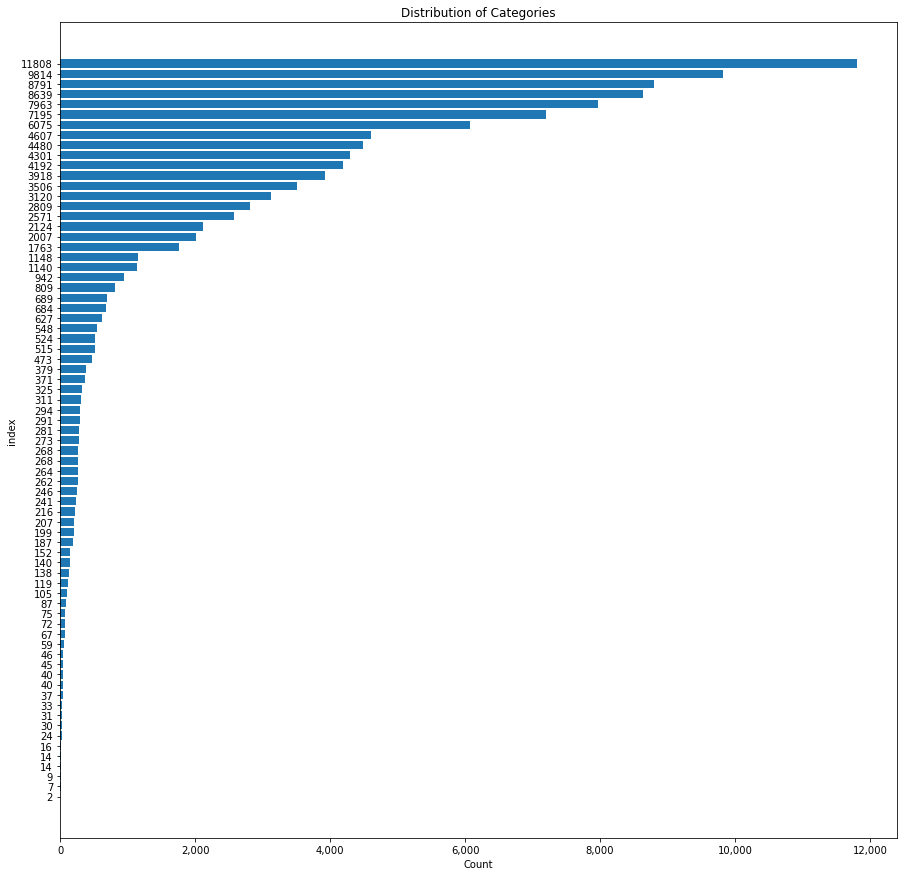

In [15]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.product_category_english
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

From the violin and horizontal bar plots we can see a very very heavily skewed distribution of observation counts among the levels of the 'customer_city' and 'product_category_english' columns. Many of the levels have fewer than 100 observations. These 'rare' levels will be re-labeled as 'others'. 

In [16]:
#Check point
olist_model2 = copy.deepcopy(olist_model)

In [17]:
#replace instances that are less than 500 with 'other product category'
_ = olist_model2.product_category_english.map(olist_model2.product_category_english.value_counts()) < 500
olist_model2.product_category_english =  olist_model2.product_category_english.mask(_, 'other_product_category')

In [18]:
#I created the value counts as a dataframe so I better index/access the attributes for plots.
prod_cat = olist_model2.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()

In [19]:
#Check the result of the re-labeling
olist_model2.product_category_english.value_counts()

bed_bath_table                     11808
health_beauty                       9814
sports_leisure                      8791
furniture_decor                     8639
computers_accessories               7963
housewares                          7195
other_product_category              6758
watches_gifts                       6075
telephony                           4607
garden_tools                        4480
auto                                4301
toys                                4192
cool_stuff                          3918
perfumery                           3506
baby                                3120
electronics                         2809
stationery                          2571
fashion_bags_accessories            2124
pet_shop                            2007
office_furniture                    1763
luggage_accessories                 1148
consoles_games                      1140
construction_tools_construction      942
home_appliances                      809
musical_instrume

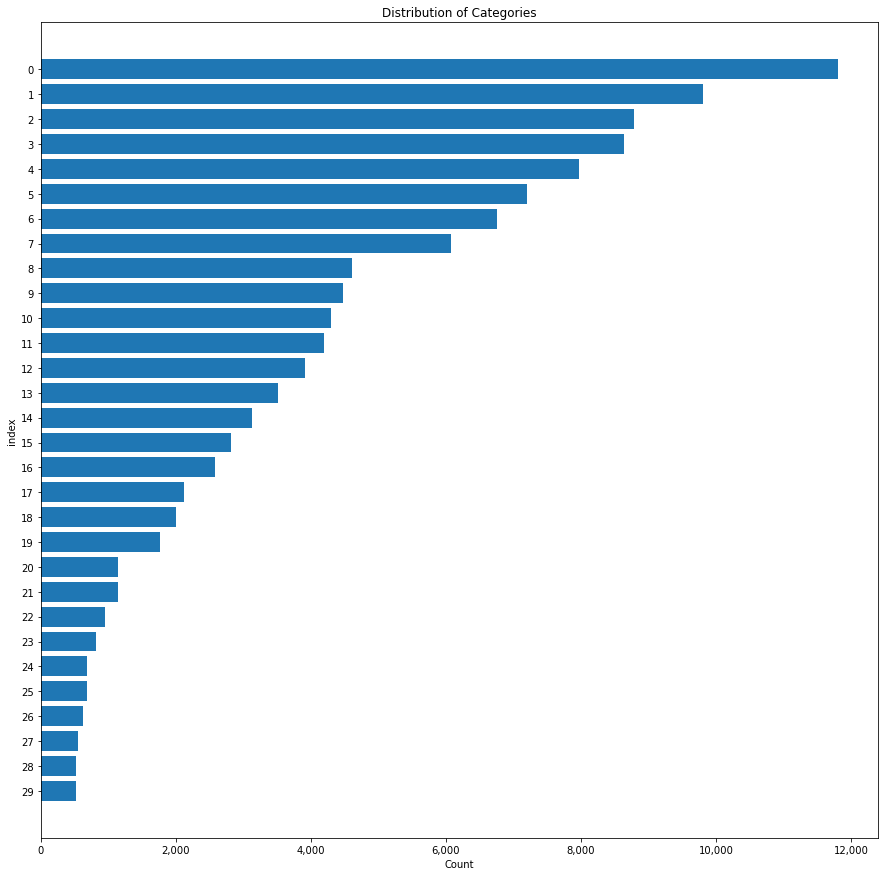

In [20]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.index
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [21]:
#How many levels do we now have in comparison with the previous version?
olist_model2.product_category_english.nunique(), olist_model.product_category_english.nunique()

(30, 73)

In [22]:
_ = olist_model2.customer_city.map(olist_model2.customer_city.value_counts()) < 300
olist_model2.customer_city =  olist_model2.customer_city.mask(_, 'other_city')

In [23]:
cu_city = olist_model2.customer_city.value_counts()
cu_city=cu_city.reset_index()

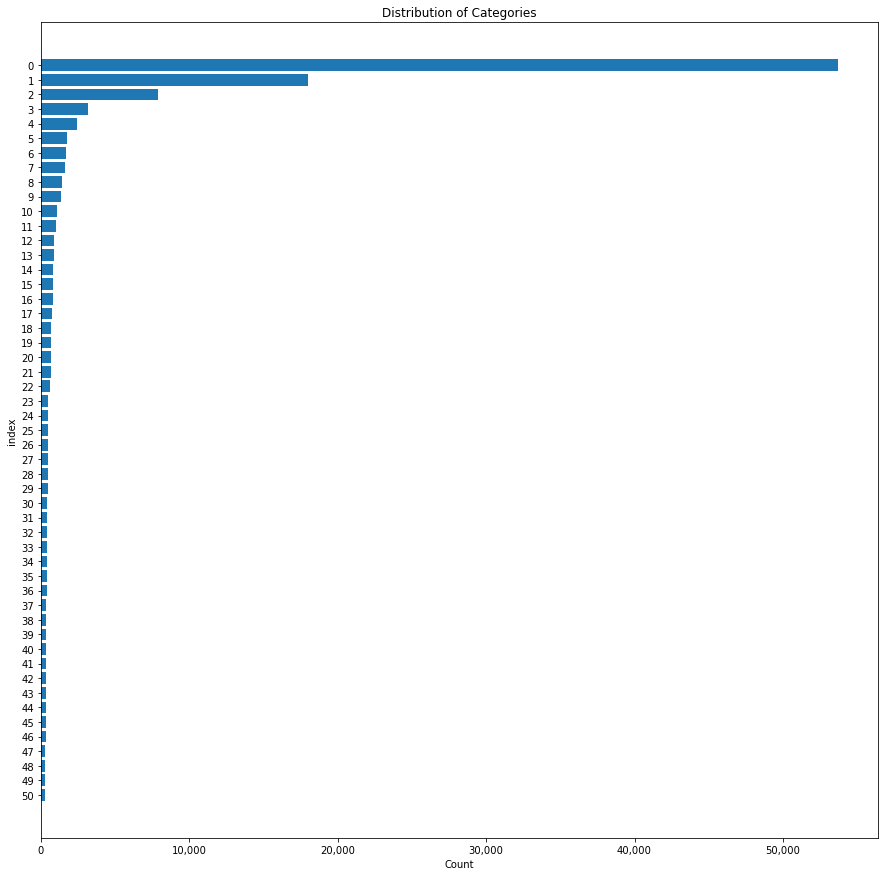

In [24]:
#Check the result
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [25]:
#How many levels do we now have in comparison with the previous version?
olist_model.customer_city.nunique(), olist_model2.customer_city.nunique()

(4073, 51)

Now we see that 'rarely' occurring levels have been re-coded. This reduces our number of levels by more than 50% in product category attribute while we only have about 1% (from 4073 to 51 levels) in the customer city attribute.

## <span style='color:blue'><u> Data pre-processing </u></span>

        - Here, a subset of the dataset attributes will be used for prediction.
        - more data preparation will also will conducted
**Feature selection** 
    - Based on business understanding, the features that are relevant for predicting actual_delivery_duration (days) will be manually selected, especially given that the number of columns are too many.
    - I believe manual selection is more effective than using an algorithm for the selection since irrelevant attributes sometimes end up in such outputs, at times.

In [26]:
olist_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [27]:
#Subset for the modeling dataset
olist_model3 = olist_model2[['payment_sequential', 'payment_installments', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'tot_order_amt', 
                            'freight_value', 'product_dimensions', 'purchase_wk_day', 'purchase_month','review_score_class', 'product_weight_g', 'customer_city',
                            'customer_zip_code_prefix','order_approved_at', 'order_delivery_actual_duration']]
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   payment_sequential              114067 non-null  float64
 1   payment_installments            114067 non-null  float64
 2   product_category_english        114067 non-null  object 
 3   seller_zip_code_prefix          114067 non-null  float64
 4   seller_city                     114067 non-null  object 
 5   tot_order_amt                   114067 non-null  float64
 6   freight_value                   114067 non-null  float64
 7   product_dimensions              114066 non-null  float64
 8   purchase_wk_day                 114067 non-null  object 
 9   purchase_month                  114067 non-null  object 
 10  review_score_class              114067 non-null  object 
 11  product_weight_g                114066 non-null  float64
 12  customer_city   

In [28]:
olist_model3.head(n=30)

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration
0,1.0,8.0,home_construction,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14
5,1.0,2.0,bed_bath_table,14940.0,ibitinga,128.45,14.88,11880.0,Monday,May,good,835.0,other_city,18570,2018-05-21 16:14:41,11
6,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7
8,1.0,1.0,housewares,13206.0,jundiai,81.16,21.26,32994.0,Friday,June,good,7000.0,belo horizonte,31230,2017-06-23 13:25:19,10
9,1.0,3.0,perfumery,17350.0,igaracu do tiete,51.84,11.85,2376.0,Monday,June,good,425.0,other_city,15200,2017-06-05 10:55:16,18


In [29]:
#I realized that most ML models prefer working with numerics so some of the categorical levels as numeric codes
olist_model3.review_score_class.unique()
olist_model3['review_score_class_num'] = olist_model3.review_score_class.copy().astype("category").cat.codes

#so: 0 = Bad, 1 = fair, 2 = Good
olist_model3.head(n=25)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num
0,1.0,8.0,home_construction,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
5,1.0,2.0,bed_bath_table,14940.0,ibitinga,128.45,14.88,11880.0,Monday,May,good,835.0,other_city,18570,2018-05-21 16:14:41,11,2
6,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7,2
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7,2
8,1.0,1.0,housewares,13206.0,jundiai,81.16,21.26,32994.0,Friday,June,good,7000.0,belo horizonte,31230,2017-06-23 13:25:19,10,2
9,1.0,3.0,perfumery,17350.0,igaracu do tiete,51.84,11.85,2376.0,Monday,June,good,425.0,other_city,15200,2017-06-05 10:55:16,18,2


**Correcting attribute data types**
We need to ensure that data types are suitably represented.

In [30]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   payment_sequential              114067 non-null  float64
 1   payment_installments            114067 non-null  float64
 2   product_category_english        114067 non-null  object 
 3   seller_zip_code_prefix          114067 non-null  float64
 4   seller_city                     114067 non-null  object 
 5   tot_order_amt                   114067 non-null  float64
 6   freight_value                   114067 non-null  float64
 7   product_dimensions              114066 non-null  float64
 8   purchase_wk_day                 114067 non-null  object 
 9   purchase_month                  114067 non-null  object 
 10  review_score_class              114067 non-null  object 
 11  product_weight_g                114066 non-null  float64
 12  customer_city   

In [31]:
cat_features = ['customer_city', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'product_category_english', 'purchase_wk_day', 'purchase_month',
               'review_score_class', 'review_score_class_num'] 

In [32]:
olist_model3[cat_features] = olist_model3[cat_features].astype("category")


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Relevance of order hour of day 

- A new attribute will be created for the hour of day that the order was approved. 
- The hour of day will be extracted from the order_approved_at timestamp

#### Working with the date.

In [33]:
#Strip time of day from the date attribute.
from datetime import datetime
#first chnage the datatype of order_approved_at to datetime type.
olist_model3['order_approved_at']=pd.to_datetime(olist_model3['order_approved_at'])

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
#Here we confirm that order_approved_at is now a datetime data type.
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [35]:
olist_model3.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num
0,1.0,8.0,home_construction,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2


**Hour Extraction**
- Round off the approved_at time datatype to nearest hour. 
    - e.g.: 9.52 = 10.00, 11:18 = 11:00
- Then extract the rounded off hour from the full timestamp
- Following successful extraction, we change the resulting object datatype to integar datatype
- Unused columns will be dropped afterwards

In [36]:
#create a new column for the hour of day of the order
olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
#Extract the hour from from the newly created time
olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [40]:
olist_model3.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num,order_approved_time2,order_approved_hour
0,1.0,8.0,home_construction,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0,2018-04-25 22:00:00,22
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2,2018-06-26 11:00:00,11
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2,2017-12-14 10:00:00,10
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12


**Extraction**
- order_approved_time2 shows the timestamp with hour segment rounded off
- order_approved_hour shows the final result of the extraction.
- order_approved_hour now renders some columns irrelevant
    - these irrrelevant columns will be removed BUT we use a deep copy() of the dataset from here on.

In [41]:
#Checkpoint: 
olist_model4 = copy.deepcopy(olist_model3)
olist_model4.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num,order_approved_time2,order_approved_hour
0,1.0,8.0,home_construction,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0,2018-04-25 22:00:00,22
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2,2018-06-26 11:00:00,11
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2,2017-12-14 10:00:00,10
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12


In [42]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [43]:
olist_model4['order_deliver_actual_duration'] = olist_model4['order_delivery_actual_duration']

#It is preferable for the attribute to be in float so show the model that it is continuous
olist_model4['order_deliver_actual_duration'] = olist_model4['order_deliver_actual_duration'].astype("float64")

In [44]:
#Remove columns that are recoded.
olist_model4.drop(columns=['order_delivery_actual_duration', 
                           'review_score_class', 
                          'order_approved_time2',
                          'order_approved_at'
                          ], inplace =True) #it is safe to use inplace=True since this is a copy of the dataset.

In [45]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             114067 non-null  float64 
 1   payment_installments           114067 non-null  float64 
 2   product_category_english       114067 non-null  category
 3   seller_zip_code_prefix         114067 non-null  category
 4   seller_city                    114067 non-null  category
 5   tot_order_amt                  114067 non-null  float64 
 6   freight_value                  114067 non-null  float64 
 7   product_dimensions             114066 non-null  float64 
 8   purchase_wk_day                114067 non-null  category
 9   purchase_month                 114067 non-null  category
 10  product_weight_g               114066 non-null  float64 
 11  customer_city                  114067 non-null  category
 12  customer_zip_cod

#### Duplicates
**See summary section above for explanation on duplicates
- Check for duplicates
- if found, remove them.


In [46]:
olist_model4.duplicated().sum()
#we have 11010 duplicates in this version of the dataset.

11010

In [47]:
#First occurrence of duplicated rows are shown here
olist_model4.loc[olist_model4.duplicated(), :]

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,product_weight_g,customer_city,customer_zip_code_prefix,review_score_class_num,order_approved_hour,order_deliver_actual_duration
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,1200.0,juiz de fora,36060,2,12,14.0
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,623.0,other_city,13614,2,16,7.0
16,1.0,1.0,electronics,9850.0,sao bernardo do campo,37.89,18.24,4680.0,Monday,June,150.0,uberlandia,38408,0,17,9.0
29,1.0,10.0,other_product_category,89070.0,blumenau,86.43,26.44,7680.0,Monday,August,700.0,other_city,32678,0,9,6.0
31,1.0,1.0,cool_stuff,6132.0,osasco,55.11,16.11,48000.0,Friday,August,600.0,other_city,35162,2,3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113948,1.0,2.0,watches_gifts,5849.0,sao paulo,46.63,17.63,352.0,Monday,December,200.0,fortaleza,60873,2,9,9.0
113962,1.0,1.0,sports_leisure,9780.0,sao bernardo do campo,82.92,12.93,1936.0,Thursday,March,700.0,other_city,37701,0,20,7.0
113971,1.0,1.0,consoles_games,17900.0,dracena,43.00,15.10,2304.0,Monday,January,100.0,other_city,37810,2,11,14.0
113976,1.0,5.0,bed_bath_table,32677.0,betim,35.07,15.10,19200.0,Thursday,January,350.0,other_city,28735,2,1,4.0


In [48]:
#Removing the duplicates
olist_model5 = copy.deepcopy(olist_model4)
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             114067 non-null  float64 
 1   payment_installments           114067 non-null  float64 
 2   product_category_english       114067 non-null  category
 3   seller_zip_code_prefix         114067 non-null  category
 4   seller_city                    114067 non-null  category
 5   tot_order_amt                  114067 non-null  float64 
 6   freight_value                  114067 non-null  float64 
 7   product_dimensions             114066 non-null  float64 
 8   purchase_wk_day                114067 non-null  category
 9   purchase_month                 114067 non-null  category
 10  product_weight_g               114066 non-null  float64 
 11  customer_city                  114067 non-null  category
 12  customer_zip_cod

In [49]:
olist_model5.drop_duplicates(inplace = True) 
# setting 'inplace = True' ensures the duplicates are dropped from the dataset and not just this session

In [50]:
#Sanity check.
#Now the 11,000 duplicates have been removed.
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103057 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             103057 non-null  float64 
 1   payment_installments           103057 non-null  float64 
 2   product_category_english       103057 non-null  category
 3   seller_zip_code_prefix         103057 non-null  category
 4   seller_city                    103057 non-null  category
 5   tot_order_amt                  103057 non-null  float64 
 6   freight_value                  103057 non-null  float64 
 7   product_dimensions             103056 non-null  float64 
 8   purchase_wk_day                103057 non-null  category
 9   purchase_month                 103057 non-null  category
 10  product_weight_g               103056 non-null  float64 
 11  customer_city                  103057 non-null  category
 12  customer_zip_cod

In [73]:
#How much was removed = 10%
len(olist_model5)/len(olist_model4)

0.9034777806026283

# Modeling and Evaluation (70 points total)
* [10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* [20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

In [74]:
#import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

#### Train_test split
**stratified, shuffle**
- Using the crossvalidation combined with for-loop as taught in class generated error that relate index
- Alternatively, 
    - we found the stratified and shuffle as 'settable' parameters in the sci-kit learn's generic train_test_split() method.
    - My only concern is that since we are not explicitly assigning the instances based on unique id (e.g. index), may be the shuffling might wrongly assign an instance to train as well as test at each shuffle event. The documentation did not show this concern.
- Random state is set to prevent data leakage and to ensure reproducibility
- Even though we generally worry about class-imbalance in a target attribute, such is not applicable in this regression task where the target variable is a continuous datatype
    -*however*, the correlation heatmap implies that review score attribute has the highest correlation coefficient with delivery attributes.
    - To mine the review_score attribute efficiently we ensure that the class proportions with respect to review_class are maintained across all splits. viz: main dataset, train set, test set.
- The train_test split uses shuffle by default.
    - We must avoid data leakage/snooping so we set random seed so that we don't get to 'see' the test set in subsequent runs of split.


In [57]:
#train test split
#set the random state. Stratify based on review_score _class. see explanation above 

from sklearn.model_selection import train_test_split
olist_train, olist_test = train_test_split(olist_model5, test_size=0.2,random_state=100, 
                                           stratify = olist_model5.review_score_class_num)

In [58]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
olist_train['review_score_class_num'].value_counts()/len(olist_train)

2    0.775923
0    0.139875
1    0.084202
Name: review_score_class_num, dtype: float64

In [60]:
#Proportions of class in the review_score_class attribute in the main dataset
olist_model5['review_score_class_num'].value_counts()/len(olist_model5)

2    0.775930
0    0.139874
1    0.084196
Name: review_score_class_num, dtype: float64

In [61]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
olist_test['review_score_class_num'].value_counts()/len(olist_test)

2    0.775956
0    0.139870
1    0.084174
Name: review_score_class_num, dtype: float64

**Stratified**:
- we can see that the 77%, 14% and 8% proportions are maintained across all the split sets.

In [62]:
olist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82445 entries, 29160 to 47597
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             82445 non-null  float64 
 1   payment_installments           82445 non-null  float64 
 2   product_category_english       82445 non-null  category
 3   seller_zip_code_prefix         82445 non-null  category
 4   seller_city                    82445 non-null  category
 5   tot_order_amt                  82445 non-null  float64 
 6   freight_value                  82445 non-null  float64 
 7   product_dimensions             82444 non-null  float64 
 8   purchase_wk_day                82445 non-null  category
 9   purchase_month                 82445 non-null  category
 10  product_weight_g               82444 non-null  float64 
 11  customer_city                  82445 non-null  category
 12  customer_zip_code_prefix    

In [63]:
olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 16584 to 59482
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             20612 non-null  float64 
 1   payment_installments           20612 non-null  float64 
 2   product_category_english       20612 non-null  category
 3   seller_zip_code_prefix         20612 non-null  category
 4   seller_city                    20612 non-null  category
 5   tot_order_amt                  20612 non-null  float64 
 6   freight_value                  20612 non-null  float64 
 7   product_dimensions             20612 non-null  float64 
 8   purchase_wk_day                20612 non-null  category
 9   purchase_month                 20612 non-null  category
 10  product_weight_g               20612 non-null  float64 
 11  customer_city                  20612 non-null  category
 12  customer_zip_code_prefix    

In [64]:
# Separate the target variable from the dataset
olist_train_y = olist_train.order_deliver_actual_duration
len(olist_train_y)

82445

### Preprocess the test for prediction

In [65]:
#All predictor attributes
olist_train_noY = olist_train.copy().drop('order_deliver_actual_duration', axis=1)
olist_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82445 entries, 29160 to 47597
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_sequential        82445 non-null  float64 
 1   payment_installments      82445 non-null  float64 
 2   product_category_english  82445 non-null  category
 3   seller_zip_code_prefix    82445 non-null  category
 4   seller_city               82445 non-null  category
 5   tot_order_amt             82445 non-null  float64 
 6   freight_value             82445 non-null  float64 
 7   product_dimensions        82444 non-null  float64 
 8   purchase_wk_day           82445 non-null  category
 9   purchase_month            82445 non-null  category
 10  product_weight_g          82444 non-null  float64 
 11  customer_city             82445 non-null  category
 12  customer_zip_code_prefix  82445 non-null  category
 13  review_score_class_num    82445 non-null  

In [66]:
#All predictor attributes
olist_test_noY = olist_test.copy().drop('order_deliver_actual_duration', axis=1)
olist_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 16584 to 59482
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_sequential        20612 non-null  float64 
 1   payment_installments      20612 non-null  float64 
 2   product_category_english  20612 non-null  category
 3   seller_zip_code_prefix    20612 non-null  category
 4   seller_city               20612 non-null  category
 5   tot_order_amt             20612 non-null  float64 
 6   freight_value             20612 non-null  float64 
 7   product_dimensions        20612 non-null  float64 
 8   purchase_wk_day           20612 non-null  category
 9   purchase_month            20612 non-null  category
 10  product_weight_g          20612 non-null  float64 
 11  customer_city             20612 non-null  category
 12  customer_zip_code_prefix  20612 non-null  category
 13  review_score_class_num    20612 non-null  

In [67]:
#Target variable
olist_test_y = olist_test.order_deliver_actual_duration
len(olist_test_y)

20612

In [69]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer

#### Approach:

### MY OWN WORDS OF INTERPRETATION
I believe the column mismatch error could be due to the encoding that generated different number of columns for train and test sets.
I used the approach of Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically) and it solved this problem.

- This approach separated high cardinal attributes (attributes with more than 10 levels) from low cardinal one (attributes with fewer than 10 levels) .
    - High cardinal attributes are those with significant number of levels (for instance, Product_category in the dataset with 73 levels.)
    - The popular OneHotEncoding() (OHE) was used to transform both the low and high cardinal attributes.


In [75]:
#Here is more compact way of selecting features with logical conditions
#instead of listing every single column in a rather large dataset
select_numeric_features = make_column_selector(dtype_include=np.number) #selects columns based on datatype.
numeric_features = select_numeric_features(olist_train_noY)


#Let us display the selected numeric features 
print(len(numeric_features)) , print(numeric_features)

7
['payment_sequential', 'payment_installments', 'tot_order_amt', 'freight_value', 'product_dimensions', 'product_weight_g', 'order_approved_hour']


(None, None)

The custom functions below were obtained from Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically)

In [76]:
#Creates a utility custom function that selects low cardinality feature 
MAX_LEVELS = 10

def select_oh_features(df):
    
    OH_ =df.select_dtypes(['object', 'category']).apply(lambda col: col.nunique()).loc[lambda x: x <= MAX_LEVELS].index.tolist()
        
    return OH_

oh_features = select_oh_features(olist_train_noY)

print(len(oh_features)), print(oh_features)

2
['purchase_wk_day', 'review_score_class_num']


(None, None)

In [77]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [78]:
#Creates a utility custom function that selects high cardinality feature 
def select_hc_features(df):
    
    hc_ =df.select_dtypes(['object', 'category']).apply(lambda col: col.nunique()).loc[lambda x: x > MAX_LEVELS].index.tolist()
        
    return hc_


hc_features = select_hc_features(olist_train_noY)


print(len(hc_features)), print(hc_features)

6
['product_category_english', 'seller_zip_code_prefix', 'seller_city', 'purchase_month', 'customer_city', 'customer_zip_code_prefix']


(None, None)

In [80]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

**ColumnTransformer**
-Transformation functions such as standardscaler() should be applied to train and test SEPARATELY,  
    - that is why I utilized the custom function to select features.  
    -So the ColumnTransformer pipeline is now a 'generic' pipeline that works INDEPENDENTLY on train and test.

In [84]:
fullpipeline_simple = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
                                         ('hc_pipeline', oh_pipeline1, select_hc_features)],                                       
                                       remainder='drop')

In [85]:
#Make Y classification
X_train_class = fullpipeline_simple.fit_transform(olist_train_noY, olist_train_y)
X_test_class = fullpipeline_simple.transform(olist_test_noY)

In [86]:
type(X_train_class)

scipy.sparse.csr.csr_matrix

In [87]:
#sanity check
X_train_class

<82445x16954 sparse matrix of type '<class 'numpy.float64'>'
	with 1236675 stored elements in Compressed Sparse Row format>

**Pre-processed**  
- The number of columns have now increased from 15 to 16,954 and are now represented in a sparse dataset.
- This a very large dataset that has to be managed carefully.

In [116]:
print(X_train_class.shape)
print(X_test_class.shape)

(82445, 16954)
(20612, 16954)


### NaN in transformed data

- I ran my model on the pre-processed set that resulted from ColumnTransformation.
    - There was an error about NaN, infinity input values, so I figured there were NaNs in the processed dataset.
    - I used imputation to fix NaNs.

I expect the matrix to be full of 0s where each column attribute is represented as 1 and the rest as zero.

#### Modeling

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
#test preprocessed on linear regression and see what happens
lin_reg = LinearRegression()

In [98]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=100)

In [99]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10, n_jobs=-1, random_state=100)

In [100]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=100)

In [101]:
myclf = [lin_reg,sgd_reg, rnd_reg, xgb_reg]

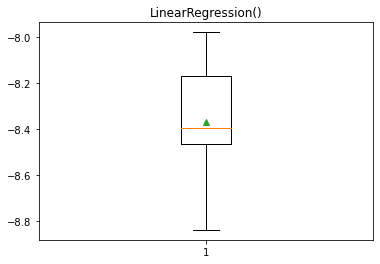

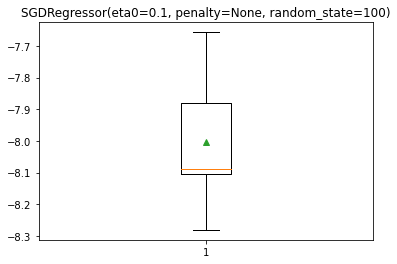

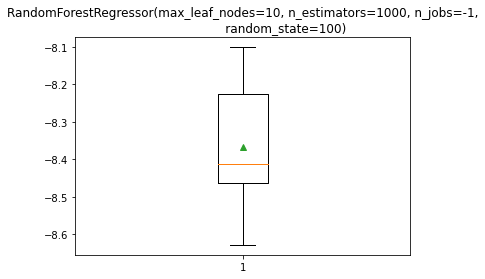

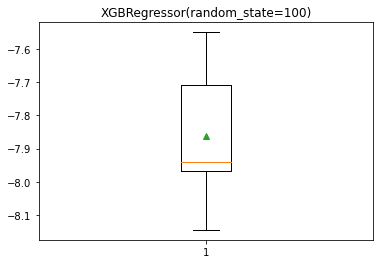

In [102]:
list_scores = []
for clf in myclf:
    scores = cross_val_score(clf, X_train_class2, olist_train_y,scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    list_scores.append(scores)    
    pyplot.boxplot(scores, showmeans=True)
    pyplot.title(clf)
    pyplot.show()    

#### Inference
The best model (XGBoost) that predicted the actual delivery duration was off by 8 days (i.e rmse = 8 days). 
- We were hoping to obtain rmse of 4 days. Regardless:  

- This means that the best estimated delivery we can advise Olist management is:
- find important features produced by the model
    - input its values and add 6 or 7 days to its whatever the result is 

### Obtain feature importance
- I hope hoping to work back from the models to see the most important features that influenced their prediction
- I will work with single regressors for this:
    - e.g. random forest, decision tree, linear model/s

In [114]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1, random_state=100)
model_rf = rnd_reg.fit(X_train_class2, olist_train_y)
y_test_pred_rf = model_rf.predict(X_test_class)

In [113]:
final_rmse = np.sqrt(mean_squared_error(olist_test_y, y_test_pred_rf))
final_rmse

8.481846518770016

## Part 2: Predict Review Score

- Predict review score
- Then generate feature importance from the best model/predictor to understand the features that best influence review score.

In [123]:
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103057 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             103057 non-null  float64 
 1   payment_installments           103057 non-null  float64 
 2   product_category_english       103057 non-null  category
 3   seller_zip_code_prefix         103057 non-null  category
 4   seller_city                    103057 non-null  category
 5   tot_order_amt                  103057 non-null  float64 
 6   freight_value                  103057 non-null  float64 
 7   product_dimensions             103056 non-null  float64 
 8   purchase_wk_day                103057 non-null  category
 9   purchase_month                 103057 non-null  category
 10  product_weight_g               103056 non-null  float64 
 11  customer_city                  103057 non-null  category
 12  customer_zip_cod

In [125]:
olist_model5.columns

Index(['payment_sequential', 'payment_installments',
       'product_category_english', 'seller_zip_code_prefix', 'seller_city',
       'tot_order_amt', 'freight_value', 'product_dimensions',
       'purchase_wk_day', 'purchase_month', 'product_weight_g',
       'customer_city', 'customer_zip_code_prefix', 'review_score_class_num',
       'order_approved_hour', 'order_deliver_actual_duration'],
      dtype='object')

In [126]:
olist_model5["review_scor_class_num"] = olist_model5["review_score_class_num"]
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103057 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             103057 non-null  float64 
 1   payment_installments           103057 non-null  float64 
 2   product_category_english       103057 non-null  category
 3   seller_zip_code_prefix         103057 non-null  category
 4   seller_city                    103057 non-null  category
 5   tot_order_amt                  103057 non-null  float64 
 6   freight_value                  103057 non-null  float64 
 7   product_dimensions             103056 non-null  float64 
 8   purchase_wk_day                103057 non-null  category
 9   purchase_month                 103057 non-null  category
 10  product_weight_g               103056 non-null  float64 
 11  customer_city                  103057 non-null  category
 12  customer_zip_cod

In [127]:
#Remove columns that are recoded.
#olist_model5.drop(columns=['review_score_class_num'], inplace =True)
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103057 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             103057 non-null  float64 
 1   payment_installments           103057 non-null  float64 
 2   product_category_english       103057 non-null  category
 3   seller_zip_code_prefix         103057 non-null  category
 4   seller_city                    103057 non-null  category
 5   tot_order_amt                  103057 non-null  float64 
 6   freight_value                  103057 non-null  float64 
 7   product_dimensions             103056 non-null  float64 
 8   purchase_wk_day                103057 non-null  category
 9   purchase_month                 103057 non-null  category
 10  product_weight_g               103056 non-null  float64 
 11  customer_city                  103057 non-null  category
 12  customer_zip_cod

In [128]:
#Simple train test split

from sklearn.model_selection import train_test_split
olist_strat_train, olist_strat_test = train_test_split(olist_model5, test_size=0.2,random_state=100, stratify=olist_model5.review_scor_class_num)

In [129]:
olist_strat_train['review_scor_class_num'].value_counts()/len(olist_strat_train)

2    0.775923
0    0.139875
1    0.084202
Name: review_scor_class_num, dtype: float64

In [130]:
olist_model5['review_scor_class_num'].value_counts()/len(olist_model5)

2    0.775930
0    0.139874
1    0.084196
Name: review_scor_class_num, dtype: float64

In [131]:
#Target variable
olist_strat_train_y = olist_strat_train.review_scor_class_num
len(olist_strat_train_y)

82445

In [132]:
olist_strat_train_noY = olist_strat_train.copy().drop('review_scor_class_num', axis=1)
olist_strat_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82445 entries, 29160 to 47597
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             82445 non-null  float64 
 1   payment_installments           82445 non-null  float64 
 2   product_category_english       82445 non-null  category
 3   seller_zip_code_prefix         82445 non-null  category
 4   seller_city                    82445 non-null  category
 5   tot_order_amt                  82445 non-null  float64 
 6   freight_value                  82445 non-null  float64 
 7   product_dimensions             82444 non-null  float64 
 8   purchase_wk_day                82445 non-null  category
 9   purchase_month                 82445 non-null  category
 10  product_weight_g               82444 non-null  float64 
 11  customer_city                  82445 non-null  category
 12  customer_zip_code_prefix    

In [133]:
#Target variable
olist_strat_test_y = olist_strat_test.review_scor_class_num
len(olist_strat_test_y)

20612

In [134]:
olist_strat_test_noY = olist_strat_test.copy().drop('review_scor_class_num', axis=1)
olist_strat_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 16584 to 59482
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             20612 non-null  float64 
 1   payment_installments           20612 non-null  float64 
 2   product_category_english       20612 non-null  category
 3   seller_zip_code_prefix         20612 non-null  category
 4   seller_city                    20612 non-null  category
 5   tot_order_amt                  20612 non-null  float64 
 6   freight_value                  20612 non-null  float64 
 7   product_dimensions             20612 non-null  float64 
 8   purchase_wk_day                20612 non-null  category
 9   purchase_month                 20612 non-null  category
 10  product_weight_g               20612 non-null  float64 
 11  customer_city                  20612 non-null  category
 12  customer_zip_code_prefix    

# Deployment (5 points total)
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
* One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?
* Boleto Bancário, commonly known as Boleto, is a popular Brazilian cash-based payment method with 15% market share. It is also the only payment method available for the 35% of shoppers who do not have a bank account.